In [175]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
%matplotlib inline

In [176]:
df=pd.read_csv('./dataset_full.csv')

In [177]:
df.head()

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,...,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
0,3,0,0,1,0,0,0,0,0,0,...,1,2,0,892,0,0,0,0,0,1
1,5,0,1,3,0,3,0,2,0,0,...,1,2,1,9540,1,0,0,0,0,1
2,2,0,0,1,0,0,0,0,0,0,...,1,2,3,589,1,0,0,0,0,0
3,4,0,2,5,0,0,0,0,0,0,...,1,2,0,292,1,0,0,0,0,1
4,2,0,0,0,0,0,0,0,0,0,...,1,2,1,3597,0,1,0,0,0,0


In [178]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
qty_dot_url,88647.0,2.191343,1.235636,1.0,2.0,2.0,2.0,24.0
qty_hyphen_url,88647.0,0.328810,1.119286,0.0,0.0,0.0,0.0,35.0
qty_underline_url,88647.0,0.113879,0.657767,0.0,0.0,0.0,0.0,21.0
qty_slash_url,88647.0,1.281781,1.893929,0.0,0.0,0.0,2.0,44.0
qty_questionmark_url,88647.0,0.009329,0.112568,0.0,0.0,0.0,0.0,9.0
...,...,...,...,...,...,...,...,...
qty_redirects,88647.0,0.343903,0.783892,-1.0,0.0,0.0,1.0,17.0
url_google_index,88647.0,0.001410,0.058640,-1.0,0.0,0.0,0.0,1.0
domain_google_index,88647.0,0.002019,0.063250,-1.0,0.0,0.0,0.0,1.0
url_shortened,88647.0,0.005482,0.073841,0.0,0.0,0.0,0.0,1.0


In [179]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88647 entries, 0 to 88646
Columns: 112 entries, qty_dot_url to phishing
dtypes: float64(1), int64(111)
memory usage: 75.7 MB


In [180]:
df.select_dtypes('float')

,time_response
0,0.207316
1,0.499566
2,0.935901
3,0.410021
4,0.410761
...,...
88642,0.135186
88643,0.397981
88644,0.745030
88645,0.307057


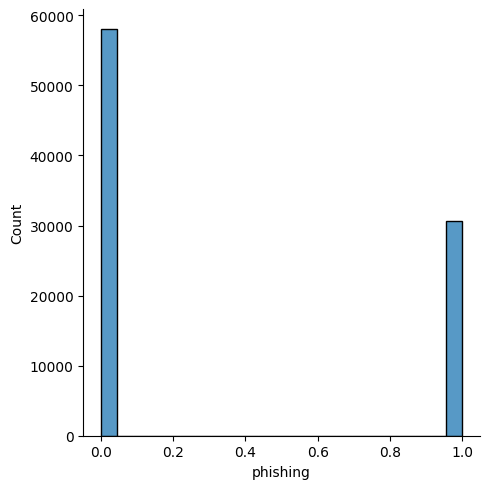

In [181]:
sns.displot(df['phishing'])

In [182]:
df.corr()

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,...,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
qty_dot_url,1.000000,0.109737,0.127851,0.246201,0.409549,0.498531,0.169224,0.550918,0.004187,-0.000405,...,-0.054120,-0.014089,-0.049845,0.012300,-0.065105,-0.051842,-0.004035,-0.002490,-0.059222,0.171128
qty_hyphen_url,0.109737,1.000000,0.213589,0.304762,0.061247,0.175158,0.041982,0.127984,0.018253,0.018090,...,0.029222,0.032991,-0.027048,-0.031027,0.009113,-0.001930,-0.002939,0.006875,-0.010346,0.200382
qty_underline_url,0.127851,0.213589,1.000000,0.246653,0.067009,0.334635,0.056885,0.256192,0.062300,-0.000767,...,0.004625,0.023962,-0.007595,-0.027089,0.012809,-0.013864,-0.001823,0.003421,-0.012158,0.191151
qty_slash_url,0.246201,0.304762,0.246653,1.000000,0.182759,0.287043,0.102281,0.202511,0.025946,0.015055,...,-0.046034,-0.032416,-0.045904,-0.021936,-0.018282,-0.047873,-0.005406,0.009470,-0.001125,0.699061
qty_questionmark_url,0.409549,0.061247,0.067009,0.182759,1.000000,0.461202,0.126747,0.467278,0.017859,0.004359,...,-0.025966,-0.003923,-0.032176,-0.006653,-0.040856,-0.024214,0.011679,0.010029,0.012847,0.111694
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
qty_redirects,-0.051842,-0.001930,-0.013864,-0.047873,-0.024214,-0.043475,-0.017895,-0.030949,0.004488,-0.006923,...,0.274887,0.051420,0.133489,0.007329,0.306561,1.000000,0.038041,0.033091,0.049475,-0.061775
url_google_index,-0.004035,-0.002939,-0.001823,-0.005406,0.011679,-0.000349,-0.001903,-0.000335,-0.000811,-0.000336,...,0.043826,0.042233,0.022227,0.007591,0.026047,0.038041,1.000000,0.628815,-0.001785,-0.008986
domain_google_index,-0.002490,0.006875,0.003421,0.009470,0.010029,0.004701,-0.001889,0.001886,-0.001076,-0.000446,...,0.039959,0.040542,0.023628,0.008920,0.027592,0.033091,0.628815,1.000000,0.000045,0.000794
url_shortened,-0.059222,-0.010346,-0.012158,-0.001125,0.012847,-0.011855,-0.005330,-0.009989,-0.002503,-0.001038,...,0.059500,0.084482,0.013533,-0.031268,0.037850,0.049475,-0.001785,0.000045,1.000000,0.099250


<AxesSubplot: >

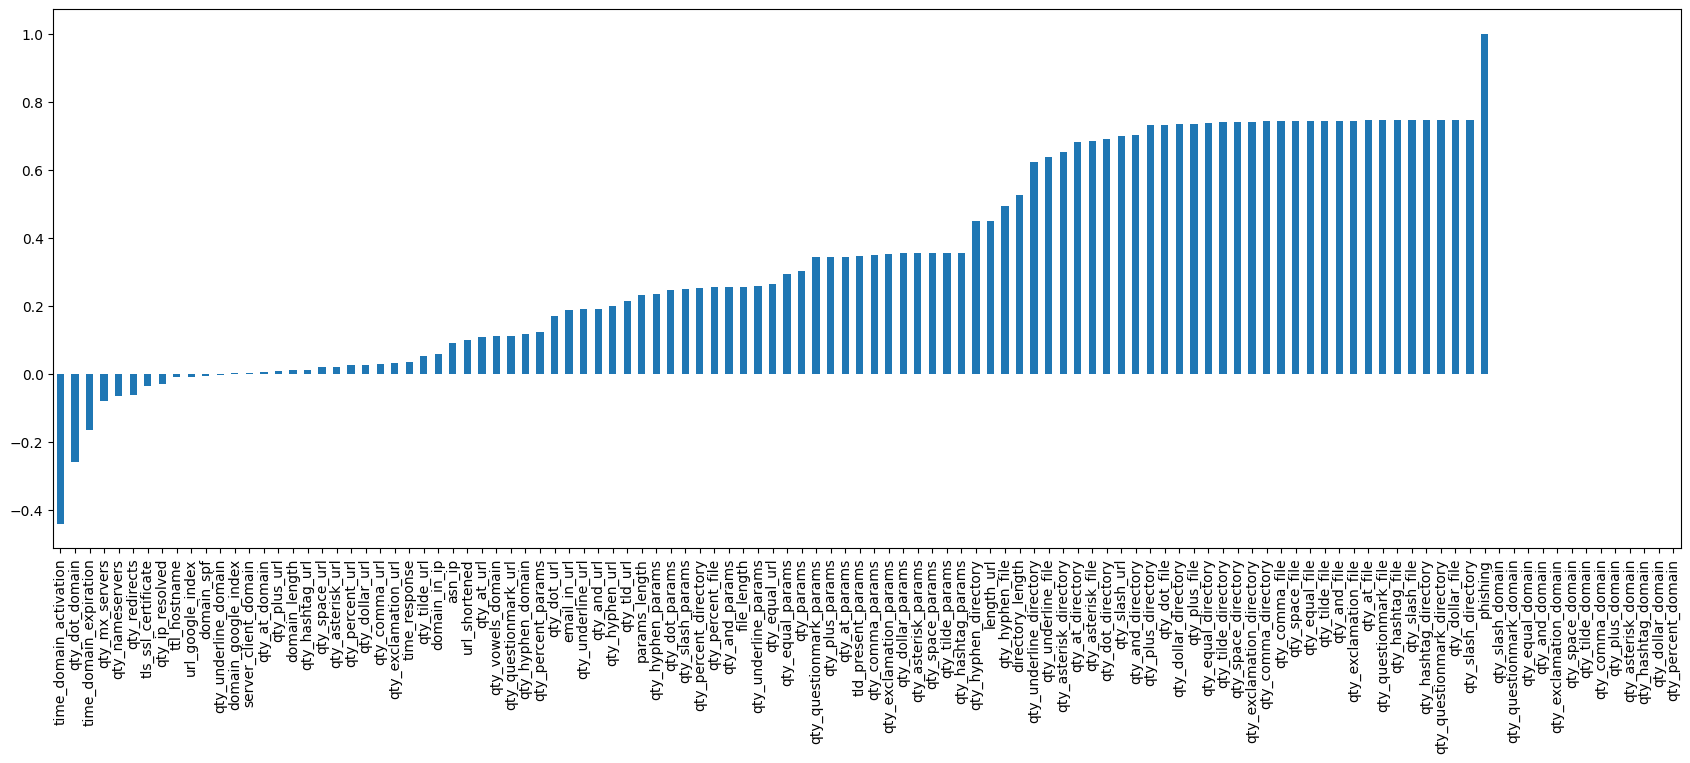

In [183]:
plt.figure(figsize=(21,7))
df.corr()['phishing'].sort_values().plot(kind='bar')

In [184]:
df.corr()['phishing'].sort_values().tail(15)

qty_slash_directory        0.746454
phishing                   1.000000
qty_slash_domain                NaN
qty_questionmark_domain         NaN
qty_equal_domain                NaN
qty_and_domain                  NaN
qty_exclamation_domain          NaN
qty_space_domain                NaN
qty_tilde_domain                NaN
qty_comma_domain                NaN
qty_plus_domain                 NaN
qty_asterisk_domain             NaN
qty_hashtag_domain              NaN
qty_dollar_domain               NaN
qty_percent_domain              NaN
Name: phishing, dtype: float64

In [185]:
df = df.drop(columns=['qty_slash_domain',                   
'qty_questionmark_domain',            
'qty_equal_domain',                   
'qty_and_domain',                     
'qty_exclamation_domain',             
'qty_space_domain',                   
'qty_tilde_domain',                   
'qty_comma_domain',                   
'qty_plus_domain',                    
'qty_asterisk_domain',                
'qty_hashtag_domain',                 
'qty_dollar_domain',               
'qty_percent_domain'])

<AxesSubplot: >

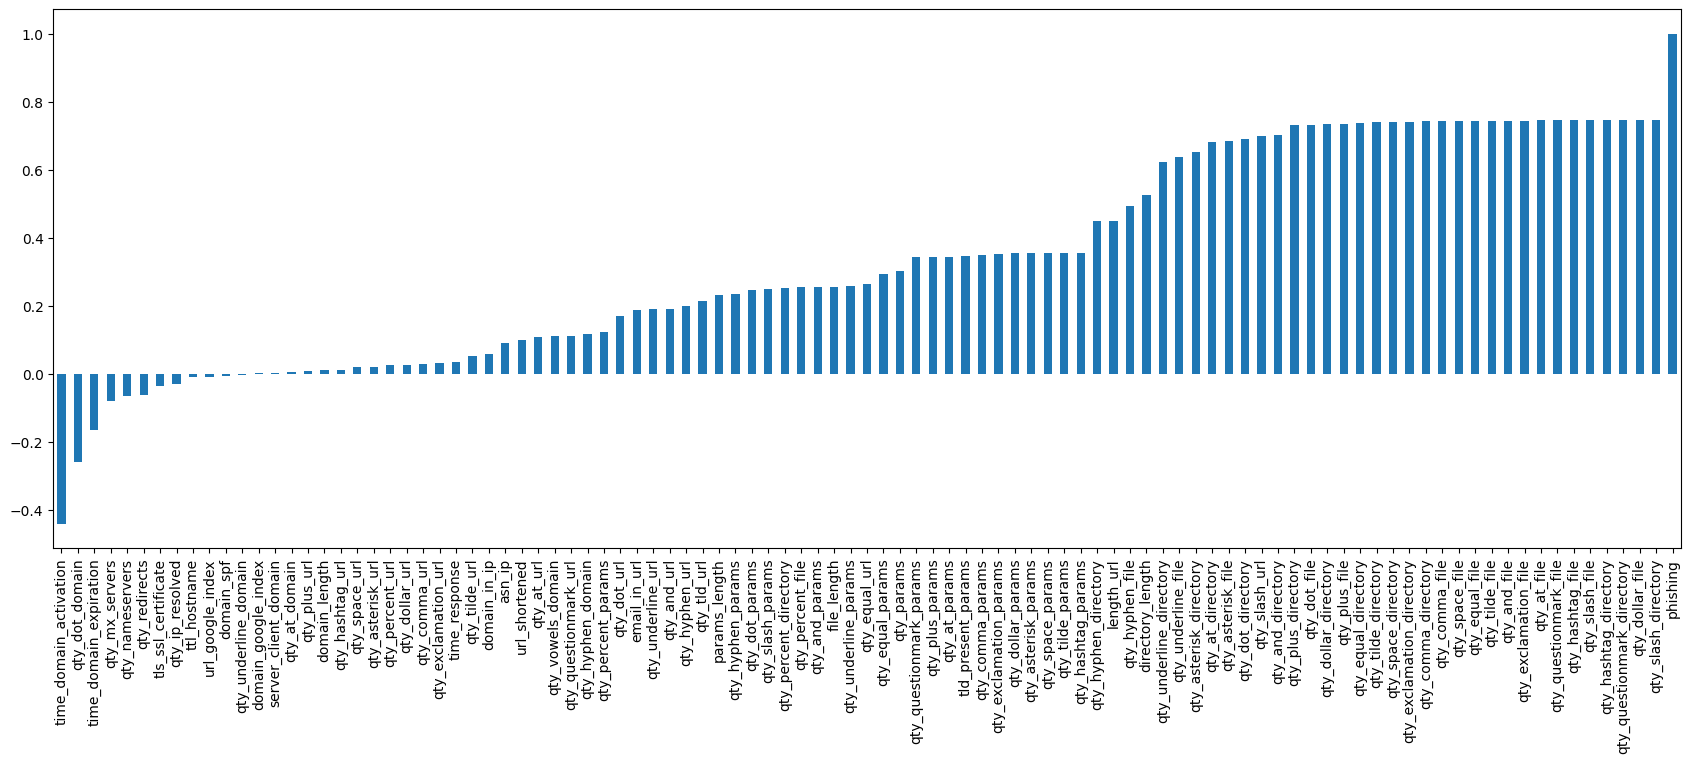

In [186]:
plt.figure(figsize=(21,7))
df.corr()['phishing'].sort_values().plot(kind='bar')

<AxesSubplot: >

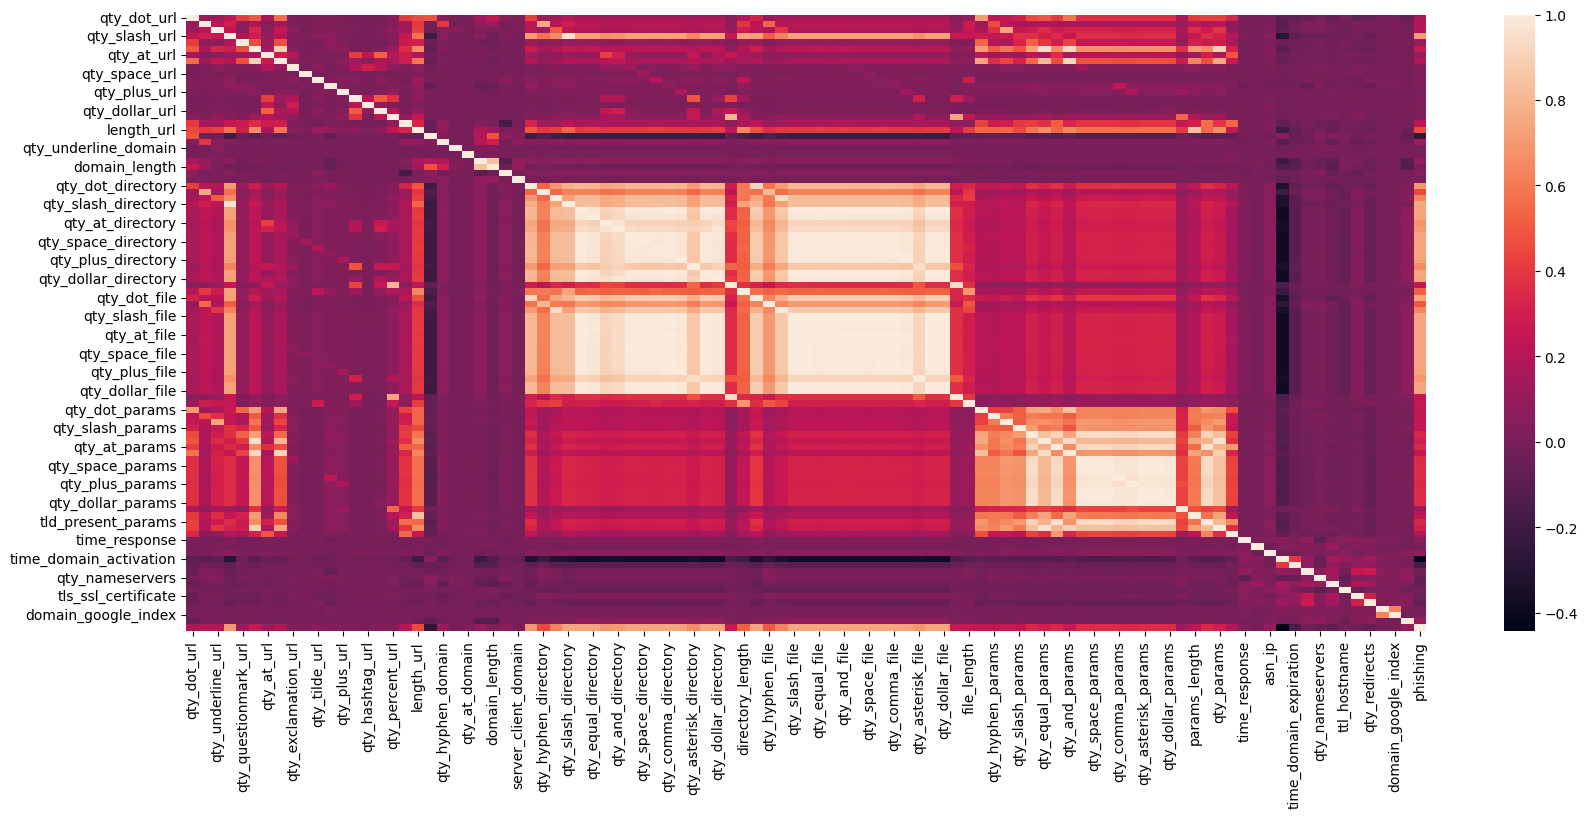

In [187]:
plt.figure(figsize=(20,8))
sns.heatmap(df.corr())

There are quite many features that are highly correlated with each other. We can simplify the process by choosing only one of the two correlated features.
Here, if a correlation between 2 feaures is greater than 0.8, we will only use one

In [188]:
corr_matrix = df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]

# Drop features 
df.drop(to_drop, axis=1, inplace=True)


<AxesSubplot: >

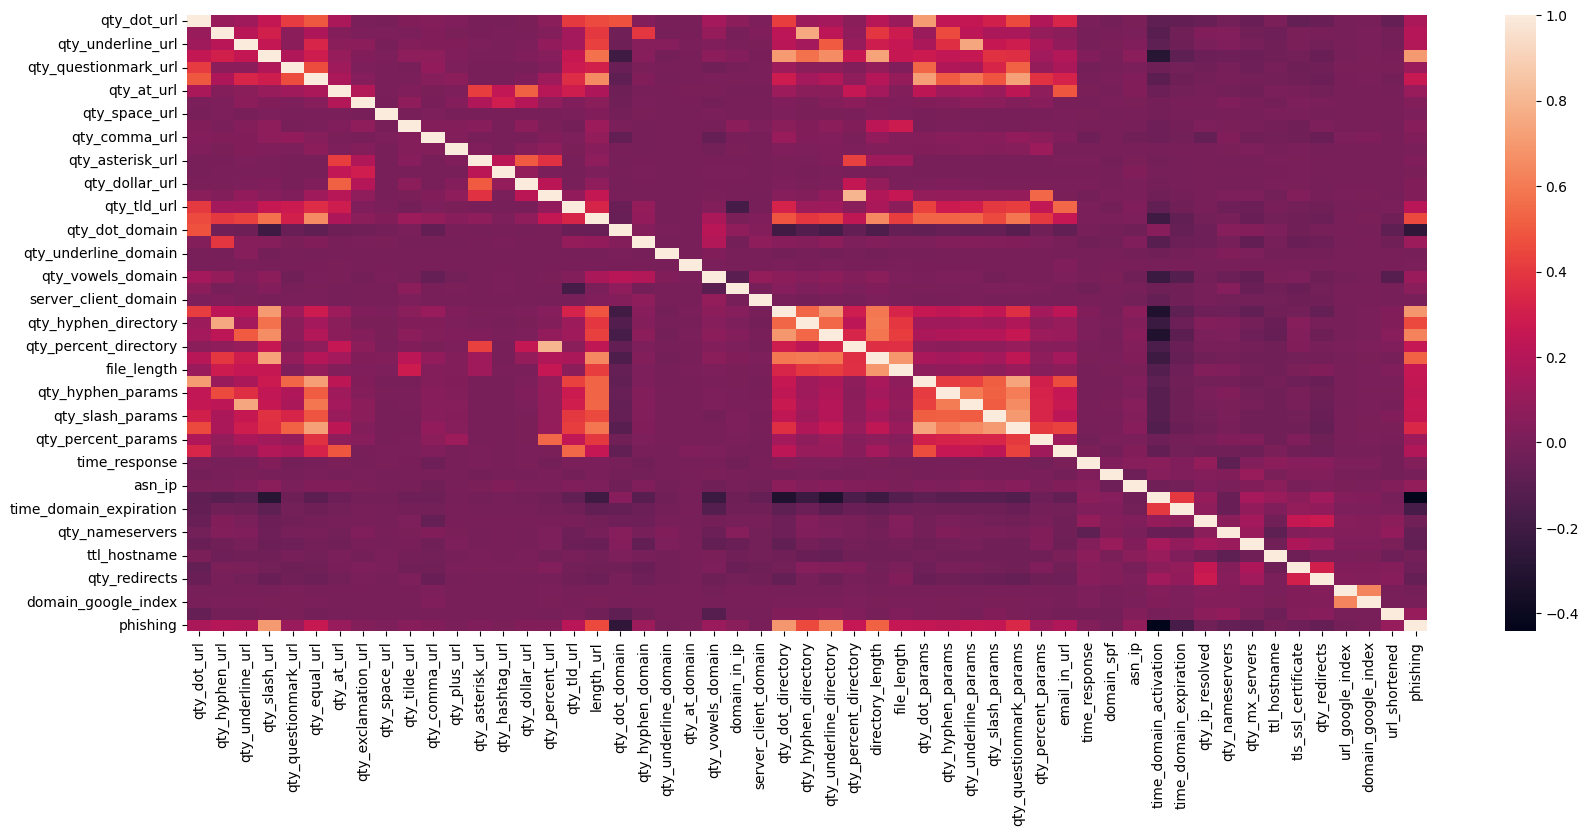

In [189]:
plt.figure(figsize=(20,8))
sns.heatmap(df.corr())

In [190]:
X=df.drop('phishing',axis=1).values
y=df['phishing'].values

In [191]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.25,random_state=101)

In [192]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [193]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [194]:
X_train.shape

(66485, 52)

We are training out model on 51 features other 'Phishing'

In [200]:
from tensorflow.keras import backend as K #To be used to delete the model and retrain it after changing configurations

K.clear_session()

In [201]:
model = Sequential()
model.add(Dense(52,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(26,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [202]:
model.compile(loss='binary_crossentropy',optimizer='adam')
model.fit(x=X_train,y=y_train,epochs=100,validation_data=(X_test,y_test))

Epoch 1/100
2078/2078 [==============================] - 2s 719us/step - loss: 0.2324 - val_loss: 0.1748
Epoch 2/100
2078/2078 [==============================] - 1s 657us/step - loss: 0.1743 - val_loss: 0.1693
Epoch 3/100
2078/2078 [==============================] - 2s 859us/step - loss: 0.1659 - val_loss: 0.1596
Epoch 4/100
2078/2078 [==============================] - 1s 698us/step - loss: 0.1616 - val_loss: 0.1577
Epoch 5/100
2078/2078 [==============================] - 1s 709us/step - loss: 0.1562 - val_loss: 0.1488
Epoch 6/100
2078/2078 [==============================] - 1s 710us/step - loss: 0.1510 - val_loss: 0.1440
Epoch 7/100
2078/2078 [==============================] - 1s 640us/step - loss: 0.1479 - val_loss: 0.1401
Epoch 8/100
2078/2078 [==============================] - 1s 599us/step - loss: 0.1447 - val_loss: 0.1396
Epoch 9/100
2078/2078 [==============================] - 1s 666us/step - loss: 0.1418 - val_loss: 0.1424
Epoch 10/100
2078/2078 [==============================]

<AxesSubplot: >

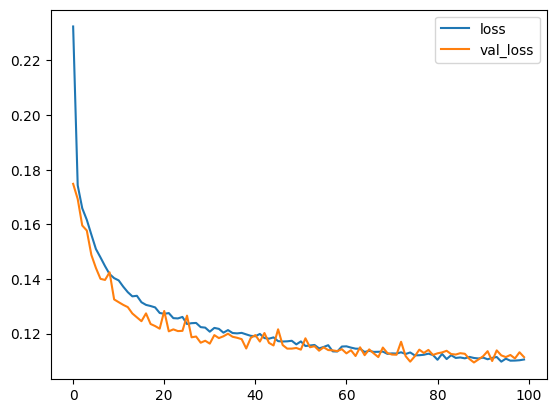

In [203]:
losses= pd.DataFrame(model.history.history)
losses.plot()

In [215]:
predictions = (model.predict(X_test)>0.5)*1
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))

693/693 [==============================] - 0s 298us/step
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     14478
           1       0.94      0.94      0.94      7684

    accuracy                           0.96     22162
   macro avg       0.96      0.96      0.96     22162
weighted avg       0.96      0.96      0.96     22162



<AxesSubplot: >

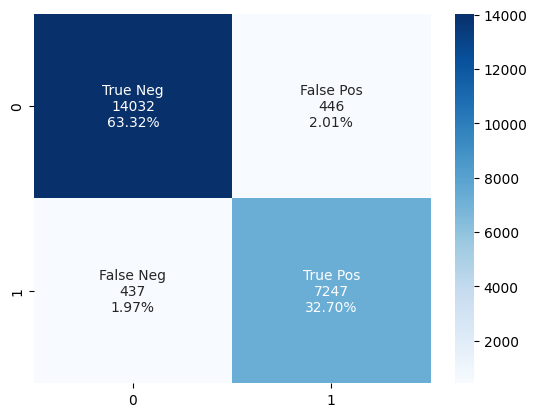

In [229]:
cf_matrix = confusion_matrix(y_test, predictions)

group_names = ["True Neg","False Pos","False Neg", "True Pos" ]
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in  zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt="", cmap='Blues')